# <h1><center>Stock prediciton using machine learning</center></h1> 

## Index

1. Introduction
2. Objective
3. Data Collection
    + 3.1 Data description
4. Python Libraries  
5. Data Reading from CSV files
6. Data Cleaning
    + 6.1 Reasons
    + 6.2 Steps to cleanup the data
        + 6.2.1 Finding Missing Data by Heatmap
           + 6.2.1.1 Heatmap for train data
           + 6.2.1.2 Heatmap for features data
           + 6.2.1.3 Heatmap for store data
        + 6.2.2 Drop large missing values
           + 6.2.2.1 Clean Up - Markdowns
        + 6.2.3 Fill the missing values with mean value of corresponding coloumns of data
7. Feature selection
8. Exploratory Data Analysis
9. Classification
    + 9.1 Feature - Type
    + 9.2 Classification based on type and holidays
10. Regression
    + 10.1 Segregation of Features and Lables
    + 10.2 Train/Test Split
    + 10.3 Regression models
        + 10.3.1 Linear Regression
        + 10.3.2 Extra Tree Regressor
    + 10.4 Evaluation of models
        + 10.4.1 Explained variance score
        + 10.4.2 MAE
        + 10.4.3 MSE
        + 10.4.2 RMSE
11. Classifier
    + 11.1 Evaluation of the Classifier
    + 11.2 Classification of the Test data
    + 11.3 Preperation of test data
    + 11.4 Categorization of Test data
    + 11.5 Prediction of the Weekly Sales
12. Final results
13. References
    + Notebooks
    + Figures and Equations
    + Internet Documents
    + E-books

## 1. Introduction


The major challenge that any conventional store facing is to get the ball park estimate of the level of inventory needed to avoid being out of stock. Though there is a variety of vendor tools to predict sales around extreme weather events, but it's an ad-hoc and time-consuming process that lacks a systematic measure of effectiveness. On assessing the factors which prove to deeply influence the quantity of sales, we have weather as an indispensable one. As weather deeply influences the mood and the spending capability of a person, it is almost directly related to the level of sales in chain stores. The main aim of this project is to identify a suitable machine learning algorithm to predict the sale of weather sensitive products.

## 2. Objective

To build a robust model that can predict the sales accurately by including all the demand forecasting challenges



## 3. Data Collection 

The value of the sales were obtained from the walmart form Kaggle [1].


### 3.1 Data description

+ Store.csv - This file contains anonymized information about the 45 stores, indicating the type and size of store.
+ train.csv -This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields
+ test.csv-This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file. 
+ features.csv-This file contains additional data related to the store, department, and regional activity for the given dates. 

        Store - the store number
        Date - the week
        Temperature - average temperature in the region
        Fuel_Price - cost of fuel in the region
        MarkDown1-5 - anonymized data related to promotional markdowns 
        CPI - the consumer price index
        Unemployment - the unemployment rate
        IsHoliday - whether the week is a special holiday week

## 4. Python Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly
from plotly import __version__#
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
    

/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



## 5. Data reading from CSV files

The walmart data is in .csv files as explained above, so we need to read this data using pandas library and assign it to Data frames. Below methods are reading data files from train.csv,features.csv and stores.csv

In [ ]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')

## 6. Data Cleaning

In real life, when we asked for data from any store, there are high chances that data will not be so perfect that you can use it directly for predictions. 

### 6.1 Reasons

Below are the reasons why it will not be perfect

1. Data will be missing for certain extent. It will have either string value 'M' or 'nan' values associated with it
2. Data will have generic data types(object, string) when it will have any missing data associated with it.
3. Data will be given in multiple irrelevent files so you have to strugle bit to merge the corrseponding data

With the above reasons, we have got a job to clean up the data before proceeding to modelling.

### 6.2 Steps to cleanup the data

1. First find out where all missing data exists by heatmap.
2. If the missing data is big then drop the corresponding columns else move to step 3
3. Fill the missing values with mean value of corresponding coloumns of data
4. Finalise the data with single data type with no missing values

#### 6.2.1 Finding Missing Data by Heatmap

One best way to check any missing values in data is the heatmap which the powerful tool by seaborn

**6.2.1.1 Heatmap for train data**

Lets check the missing values in the train.csv data file

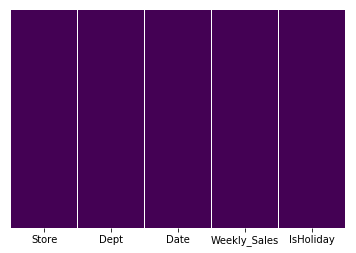

In [3]:
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

Above graph is indicative to the existince of any missing values(NA) in the train.csv dataframe From the empty graph below, there is no missing data.

**6.2.1.2 Heatmap for features data**

When we checked same heatmap for features data then we can see quite a big data missing for Markdowns 1-5. Generally for this kind of missing data, we will drop the missing data columns which can seriously affect the modelling

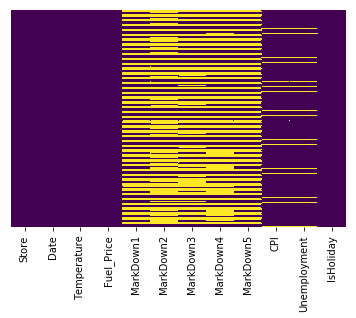

In [4]:
sns.heatmap(features_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

** 6.2.1.3 Heatmap for store data**

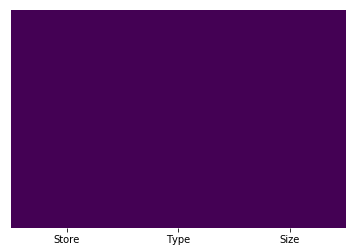

In [5]:
sns.heatmap(store_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

From above heatgraph, there were quite a few missing data in CPI and unemployment columns. We can replace this missing data with average of their columns

#### 6.2.2 Drop large missing values

**6.2.2.1 Clean Up - Markdowns **

As we have got to know there were large missing datas for the markdowns and we should drop these columns

In [ ]:
features_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

#### 6.2.3 Fill the missing values with mean value of corresponding coloumns of data

As there are some NA(nan) or missing values under the columns of 'CPI' and 'Unemployment' , we are replacing those values with mean of the corresponding columns

In [6]:
features_df['CPI'].fillna(features_df['CPI'].mean(),inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].mean(),inplace=True)

## 7. Feature selection

Once data is cleaned up then we need to select features that need to be evaluated.
1. Combin this merged data with train data on store number and date as key
2. Set your final train data with reference to x and y axes.
3. Format the data column and set year,month and day into new seperate column 

In [7]:
train_x=pd.DataFrame()
train_x=store_df.merge(train_df,on='Store')
train_x=train_x.merge(features_df,on=['Date','Store','IsHoliday'])


train_x['year'] = [int(x[0:4]) for x in list(train_x['Date'])]
train_x['month'] = [int(x[5:7]) for x in list(train_x['Date'])]
train_x['day'] = [int(x[8:]) for x in list(train_x['Date'])]
train_x.drop(['Date'],axis=1,inplace=True)

We can see from the data that there are few zero and negative values for the Weekly sales. The reason is that on that perticular dates customer returned the items which were bought from the walmart which was leading to zero or negative values.

## 8. Exploratory Data Analysis

Exploratory analysis helps in understanding the data whether its correlates to any of other features, also indicates type of the regression that needs to be done to model.

From below pair plot, We can see that

+ Distributions of store number, size, tempearute.
+ Store number, Size, Department follows almost a uniform distributions and weekly sales almost a logarithemic distributions.
+ Temeprature and fuel price are highly correlated.


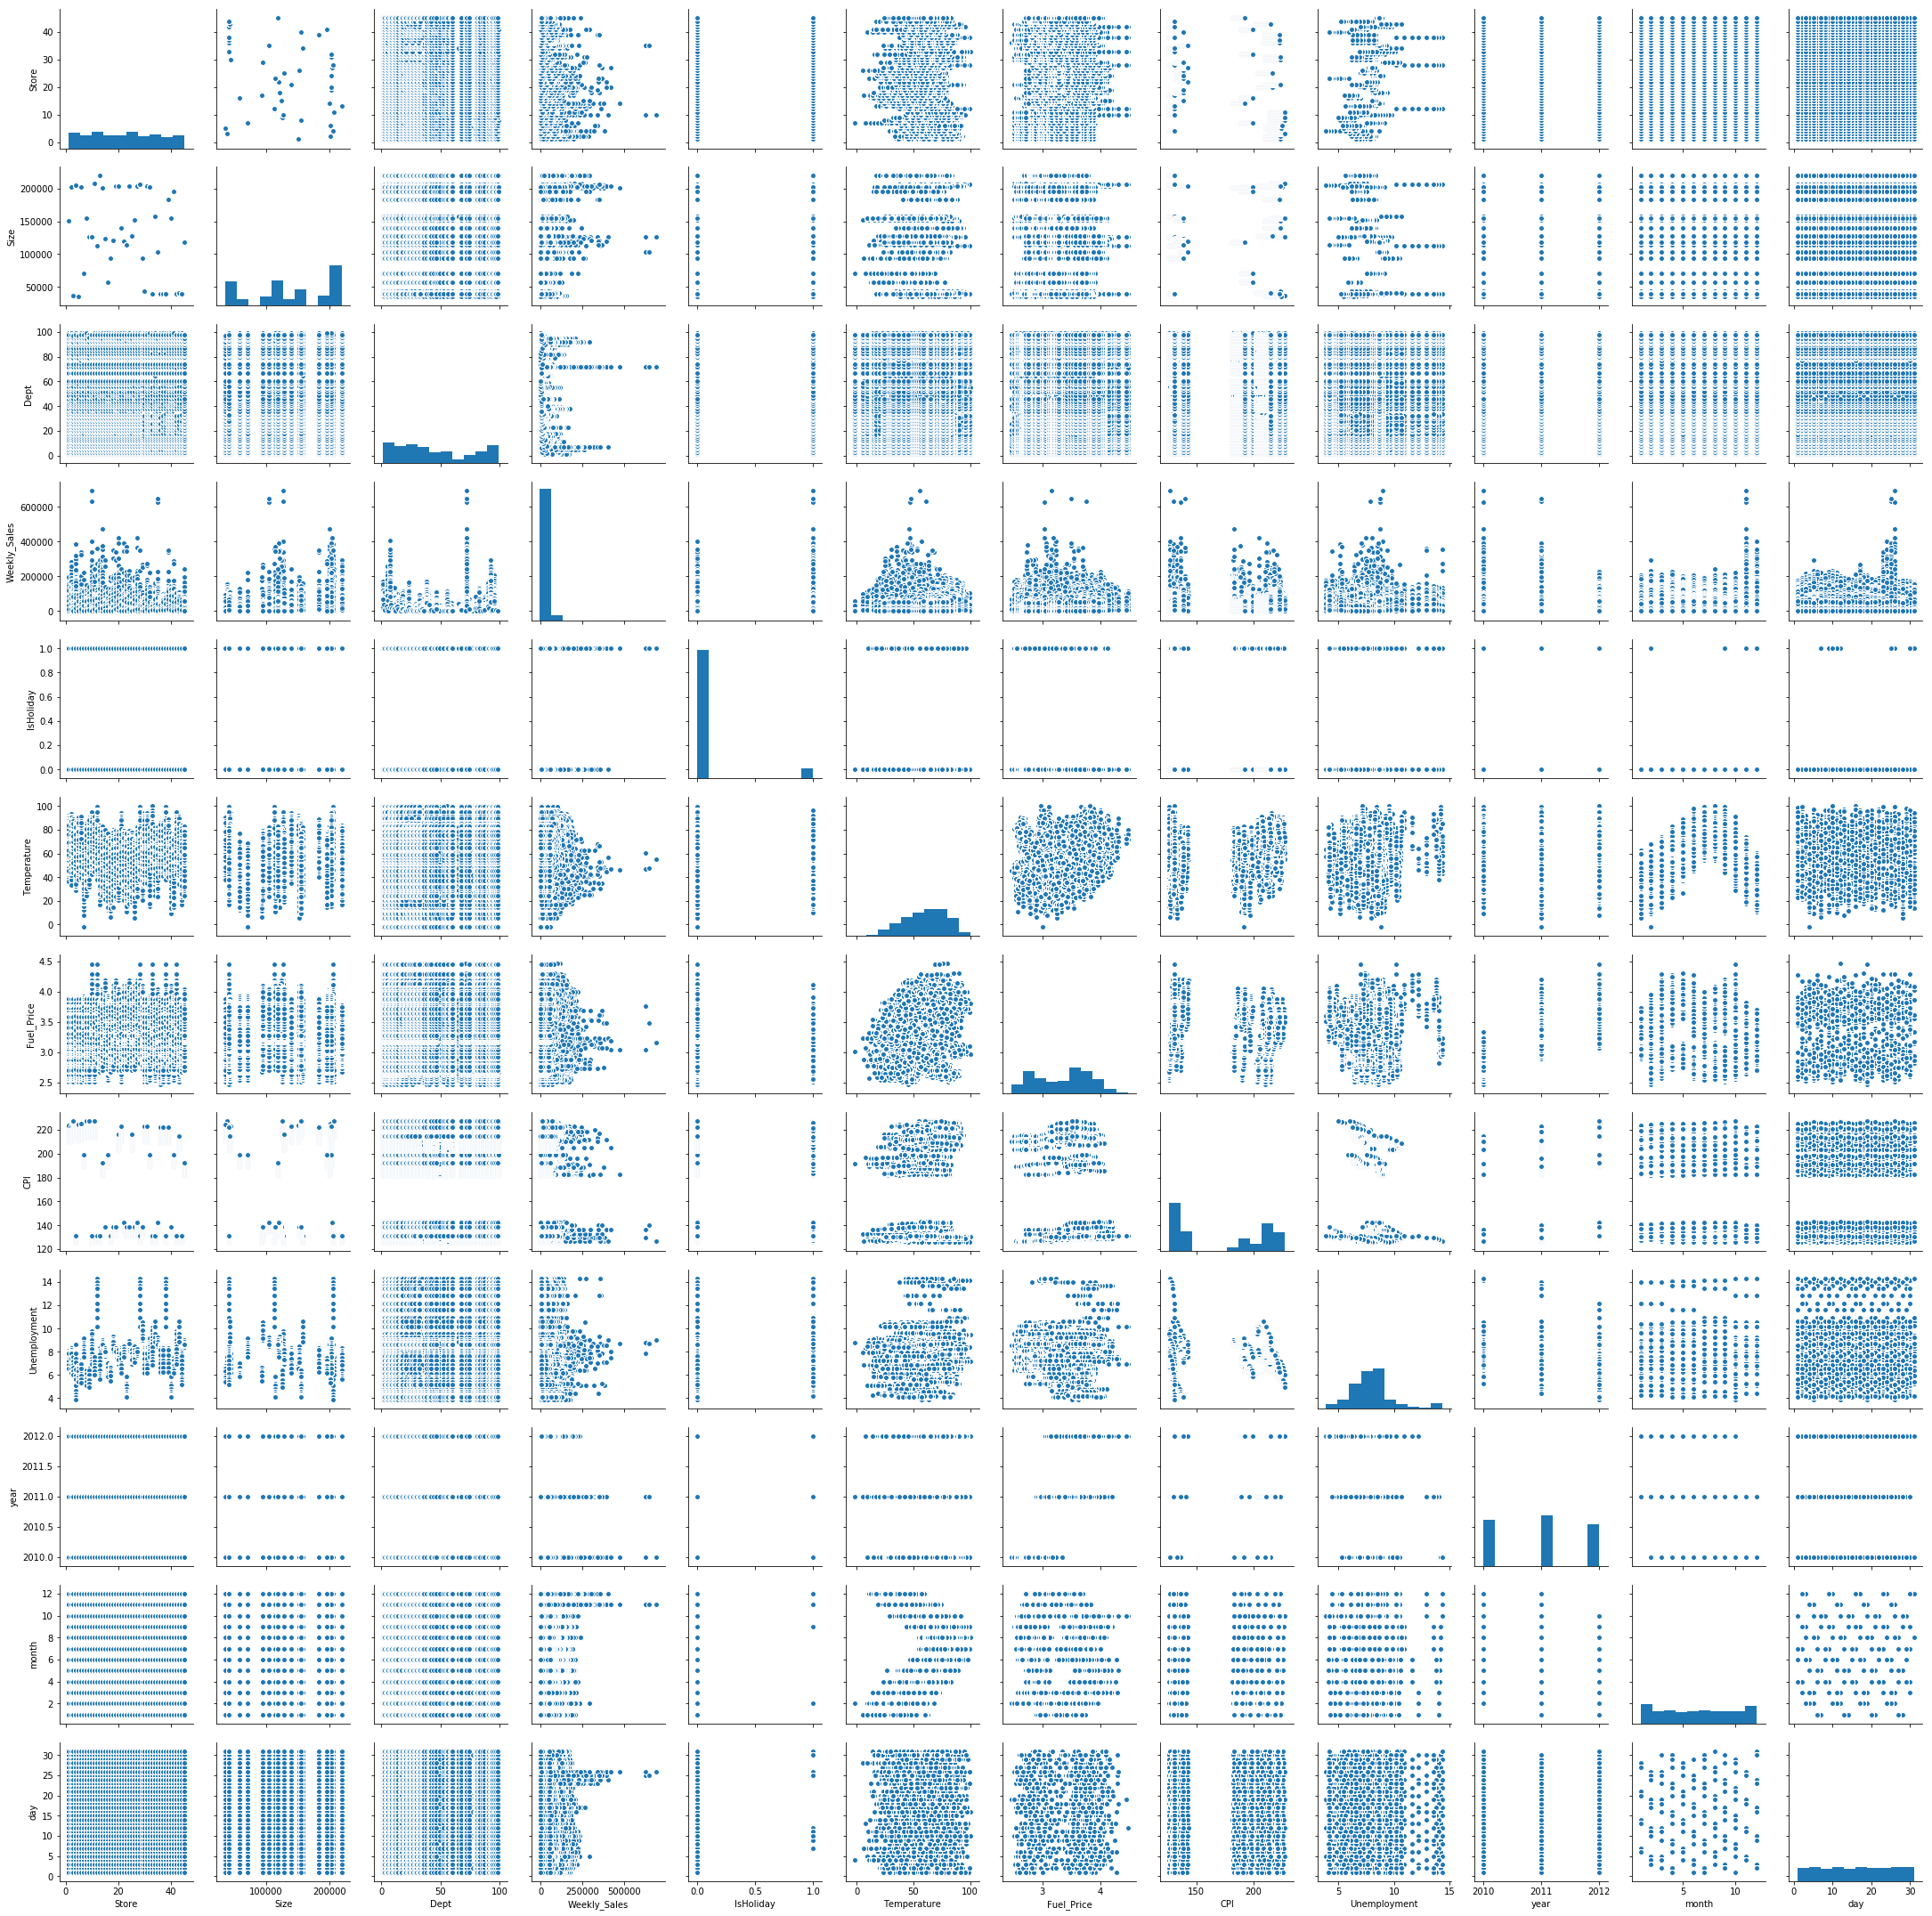

In [9]:
sns.pairplot(train_x)

## 9. Classification

### 9.1 Feature - Type

The feature 'Type'(A or B or C) is in the string format so we are replacing this by intiger 0,1,2 respectivly.
This feature can also lead us for the classification for this model

In [8]:
train_x['Type'].replace(['A','B','C'],[0,1,2],inplace=True)

### 9.2 Classification based on type and holidays

The trained data will be classified into 6 based on store 'Type' and 'IsHoliday'.

This will lead us to main 6 classifications as below

+ train data Type A(0) without holiday
+ train data Type A(0) with holiday
+ train data Type B(1) without holiday
+ train data Type B(1) with holiday
+ train data Type C(2) without holiday
+ train data Type C(2) with holiday


In [9]:
train_x_a=pd.DataFrame()
train_x_a_h=pd.DataFrame()
train_x_b=pd.DataFrame()
train_x_b_h=pd.DataFrame()
train_x_c=pd.DataFrame()
train_x_c_h=pd.DataFrame()
train_x_a_h=train_x[(train_x['Type']==0) & (train_x['IsHoliday']==True)]
train_x_a=train_x[(train_x['Type']==0) & (train_x['IsHoliday']==False)]
train_x_b_h=train_x[(train_x['Type']==1) & (train_x['IsHoliday']==True)]
train_x_b=train_x[(train_x['Type']==1) & (train_x['IsHoliday']==False)]
train_x_c_h=train_x[(train_x['Type']==2) & (train_x['IsHoliday']==True)]
train_x_c=train_x[(train_x['Type']==2) & (train_x['IsHoliday']==False)]


As we know that our ouput is the 'Weekly_Sales' that we need to predict, lets plot the strip plot of the weekly sales based on store type and holiday  

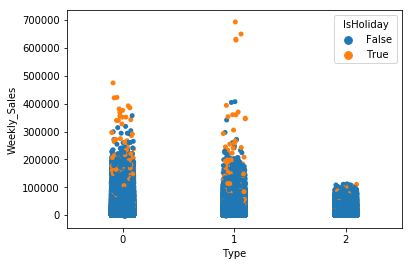

In [12]:
sns.stripplot(x="Type", y="Weekly_Sales", data=train_x, jitter=True,hue='IsHoliday')

## 10. Regression

If you were able to make predictions about something important to you, you’d probably love that, right? It’s even better if you know that your predictions are sound. In this , we will show how to use regression analysis to make predictions and determine accuracy of it

You can use regression equations to make predictions. Regression equations are a crucial part of the statistical output after you fit a model. The coefficients in the equation define the relationship between each independent variable and the dependent variable. However, you can also enter values for the independent variables into the equation to predict the mean value of the dependent variable.



### 10.1 Segregation of Features and Lables

Let us assign values for X axis (which is input i.e. Features) and Y axis(which is output i.e. Label) 

In [10]:
features=pd.DataFrame()
label=pd.DataFrame()
label=train_x_a['Weekly_Sales']

features=train_x_a.drop(['Weekly_Sales','Store','Type','Weekly_Sales','IsHoliday'],axis=1)
#label.head()



### 10.2 Train/Test Split

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

Sklearn will provide inbuilt method for the Train and Test split based on cross validation

### 10.3 Regression models
There are various kinds of regression techniques available to make predictions. These techniques are mostly driven by three metrics (number of independent variables, type of dependent variables and shape of regression line). We’ll discuss them in detail in the following sections



#### 10.3.1 Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation $Y=a+bX + e$, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

Sklearn library will provide inbuilt methods for Linear regression [2].

#### 10.3.2  Extra Tree Regressor

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

Sklearn library will provide inbuilt methods for Extra tree regression [3].



Lets run all these regression models in order to predict the data accuratly and also which model suits well

In [12]:
def evaluation(y_test,predict):
    #Evaluation of model
    from sklearn import metrics
    print('Model Evaluation Results')
    print('variance score',metrics.explained_variance_score(y_test,predict))
    print('MAE',metrics.mean_absolute_error(y_test,predict))
    print('MSE',metrics.mean_squared_error(y_test,predict))
    print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

In [15]:
def Reg(func_df):
    features=pd.DataFrame()
    label=pd.DataFrame()
    label=func_df['Weekly_Sales']
    features=func_df.drop(['Weekly_Sales','Store','Type','Weekly_Sales','IsHoliday'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3, random_state=101)
    
    
    #Linear Regression
    print('************ Linear Regression************')
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    # The coefficients
    #print('Coefficients: \n', lm.coef_)
    predict_lrm = lm.predict( X_test)
    #Evaluation of model
    plt.title('Linear Regression')
    plt.scatter(predict_lrm,y_test)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()


    
    
    #Extra Tree Regressor
    print('************ Extra Tree Regression************')
    clf = ExtraTreesRegressor(n_estimators=200,max_features='auto')
    clf.fit(X_train,y_train)
    predict_etr = clf.predict(X_test)
    plt.scatter(predict_etr,y_test)
    plt.title('Extra Tree Regressior')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    return y_test,predict_lrm,predict_etr





Let's run the regression for all 6 classified data

************ Linear Regression************


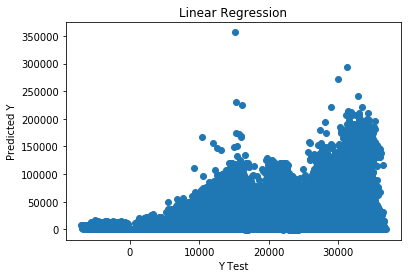

************ Extra Tree Regression************


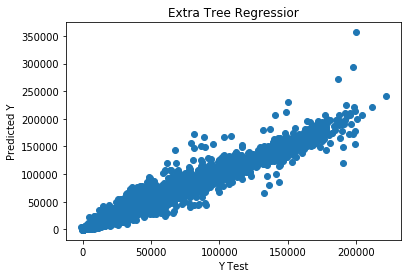

In [16]:
test_met,lrm,etr=Reg(train_x_a)


In [17]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)
#print('evaluation result for svr')
#evaluation(test_met,svr)

evaluation result for LRG
Model Evaluation Results
variance score 0.0918758575686
MAE 17683.5091513
MSE 616982422.749
RMSE 24839.1308775
evaluation result for etr
Model Evaluation Results
variance score 0.981869002745
MAE 1579.39229415
MSE 12318075.1698
RMSE 3509.7115508


************ Linear Regression************


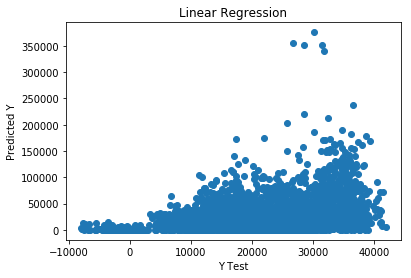

************ Extra Tree Regression************


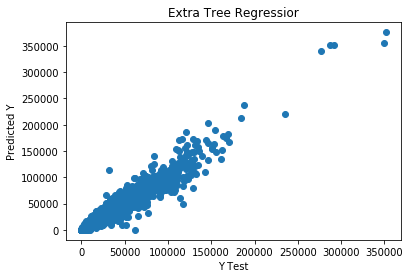

In [18]:
test_met,lrm,etr=Reg(train_x_a_h)

In [19]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)

evaluation result for LRG
Model Evaluation Results
variance score 0.0787713701045
MAE 18677.6644082
MSE 784579696.025
RMSE 28010.3498019
evaluation result for etr
Model Evaluation Results
variance score 0.940837743194
MAE 3674.3921778
MSE 50391094.4007
RMSE 7098.66849491


************ Linear Regression************


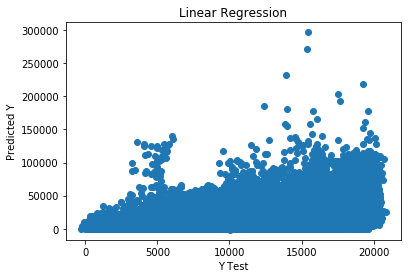

************ Extra Tree Regression************


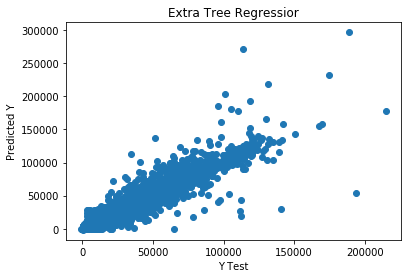

In [20]:
test_met,lrm,etr=Reg(train_x_b)

In [21]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)

evaluation result for LRG
Model Evaluation Results
variance score 0.0704583793722
MAE 10521.6718991
MSE 252881239.76
RMSE 15902.2400862
evaluation result for etr
Model Evaluation Results
variance score 0.954365507205
MAE 1359.43692262
MSE 12414995.8348
RMSE 3523.49199443


************ Linear Regression************


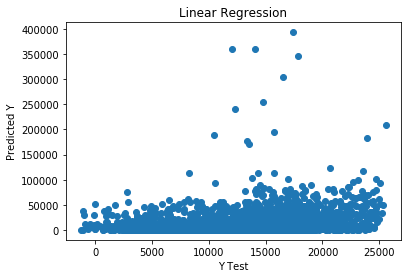

************ Extra Tree Regression************


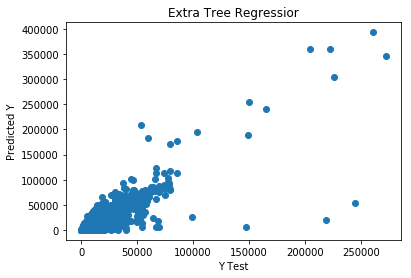

In [22]:
test_met,lrm,etr=Reg(train_x_b_h)

In [23]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)

evaluation result for LRG
Model Evaluation Results
variance score 0.0382020112398
MAE 11911.4548182
MSE 482618922.974
RMSE 21968.5894626
evaluation result for etr
Model Evaluation Results
variance score 0.718728382655
MAE 5474.29059986
MSE 141204401.259
RMSE 11882.9458157


************ Linear Regression************


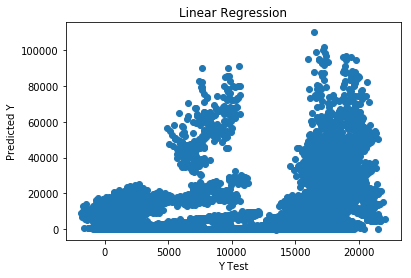

************ Extra Tree Regression************


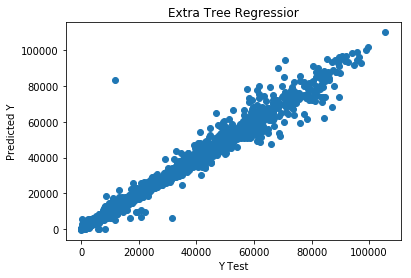

In [24]:
test_met,lrm,etr=Reg(train_x_c)

In [25]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)

evaluation result for LRG
Model Evaluation Results
variance score 0.160171960862
MAE 9984.36664365
MSE 209925500.92
RMSE 14488.8060557
evaluation result for etr
Model Evaluation Results
variance score 0.990113482321
MAE 532.467739197
MSE 2471526.34005
RMSE 1572.10888301


************ Linear Regression************


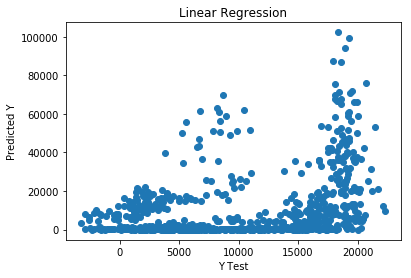

************ Extra Tree Regression************


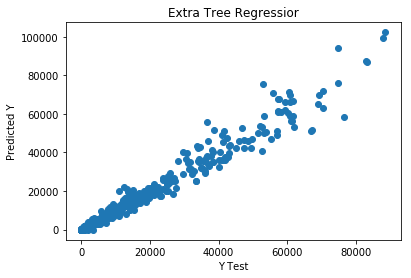

In [26]:
test_met,lrm,etr=Reg(train_x_c_h)

In [27]:
print('evaluation result for LRG')
evaluation(test_met,lrm)
print('evaluation result for etr')
evaluation(test_met,etr)

evaluation result for LRG
Model Evaluation Results
variance score 0.161523624236
MAE 10318.214447
MSE 227622088.936
RMSE 15087.149795
evaluation result for etr
Model Evaluation Results
variance score 0.971790490127
MAE 1248.81507944
MSE 7656327.24694
RMSE 2767.00691126


### 10.4 Evaluation of models

Now we have ran all three regression models for all the data(with 6 classifications inside data). We may include as many new models further before that we have to evaluate our models for accuracy

We are evaluating our models based on the performance metrics [6].

#### 10.4.1 Explained variance score

The explained_variance_score computes the explained variance regression score.

If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$ExplainedVariance(y,\hat y)=1-\frac{var(y-\hat y)}{var(y)}$$

#### 10.4.2 MAE 

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss. If $\hat{y}_i$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{\text{samples}}$ is defined as

$$ MAE(y,\hat y)= \frac {1}{n_{samples}} \sum^{n_{samples}-1}_{i=0}{\mid y-\hat y \mid}$$

#### 10.4.3 MSE

The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. If $hat{y}_i$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{\text{samples}}$ is defined as

$$ MSE(y,\hat y)= \frac {1}{n_{samples}} \sum^{n_{samples}-1}_{i=0}{(y-\hat y)^2}$$

#### 10.4.4 RMSE

Its the sqare root of MSE, which will gives the same diamension instead of measuring errors in terms of squares

$$ RMSE(y,\hat y)= \sqrt{\frac {1}{n_{samples}} \sum^{n_{samples}-1}_{i=0}{(y-\hat y)^2}}$$




### Extra Tree regressor is good fit model for our prediction

Based on above evaluation methods we have got very good explained variance score(about 0.98) for extra tree regressor.
We can follow the extra tree regressor for predicting the data

## 11 Classifier

The given data can be segregated into three classes depending upon the size of the stores.Now we devise a classifier using the Support Vector Classifier. The train data is labelled with the different classes depending upon the size of the stores.The accuracy scores along with the confusion matix and the classification report is analysed.

In [28]:
test_df = pd.read_csv('test.csv')

In [29]:
A_count=store_df[store_df['Type']=='A'].count()
B_count=store_df[store_df['Type']=='B'].count()
C_count=store_df[store_df['Type']=='C'].count()
print(A_count,B_count,C_count)



Store    22
Type     22
Size     22
dtype: int64 Store    17
Type     17
Size     17
dtype: int64 Store    6
Type     6
Size     6
dtype: int64


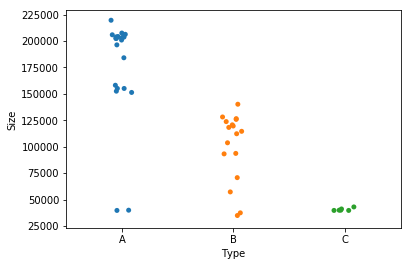

In [30]:
sns.stripplot(x="Type", y="Size", data=store_df, jitter=True)

As the classifiers tend to classify the new data more towards the Type with the less data representing it, we remove the outliers as well as equalize the number of points representing each Type.

In [31]:
# remove the outliers 
class_train=pd.DataFrame()
labels=pd.DataFrame()
class_train=store_df[(store_df['Type']=='A')& (store_df['Size']>=40000)]
class_train
class_train=class_train.append(store_df[(store_df['Type']=='B')& (store_df['Size']>=40000)])
class_train=class_train.append(store_df[store_df['Type']=='C'])
class_train
labels=pd.Categorical(class_train['Type']).codes
labels
features_cls=class_train.drop(['Type','Store'],axis=1)



In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_cls,labels, test_size=0.3, random_state=101)




In [33]:
# classifier is trained
clf = svm.SVC(C=100,kernel='rbf')
clf.fit(X_train, y_train)
pred_cls=clf.predict(X_test)

### 11.1 Evaluation of the Classifier
** Confusion Matrix**<br>
        Compute confusion matrix to evaluate the accuracy of a classification
By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.<br>
** Classification Report**<br>
        The classification report consists of the precison report,recall and the F-1 score for each type of the class.(i.e Type A,Type B and Type C) <br>
** Accuracy Score **<br>
        Accuracy classification score.In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_cls)


0.38461538461538464

In [36]:
from sklearn.metrics import classification_report
target_names = ['Type 0', 'Type 1', 'Type 2']
print(classification_report(y_test, pred_cls, target_names=target_names))


             precision    recall  f1-score   support

     Type 0       0.33      1.00      0.50         4
     Type 1       0.00      0.00      0.00         7
     Type 2       1.00      0.50      0.67         2

avg / total       0.26      0.38      0.26        13



/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_cls)

array([[4, 0, 0],
       [7, 0, 0],
       [1, 0, 1]])

### 11.2 Classification of the Test data

Thus now we use the trained model of the classifer to classify the test data depending on their corresponding store sizes.

In [38]:
# merging the test 
test_df=test_df.merge(store_df,on=['Store'])
test_df.drop(['Type'],axis=1,inplace=True)
test_dat=test_df.drop(['Dept','Date','IsHoliday','Store'],axis=1)

In [39]:
# prediction based on category
result=clf.predict(test_dat)

### 11.3 Preparation of the Test data

As the test data needs to include the features with which the model is trained , the test data is added with their corresponding features in this division.

In [40]:
test_df=test_df.merge(features_df,on=['Date','Store','IsHoliday'])
test_df['year'] = [int(x[0:4]) for x in list(test_df['Date'])]
test_df['month'] = [int(x[5:7]) for x in list(test_df['Date'])]
test_df['day'] = [int(x[8:]) for x in list(test_df['Date'])]
test_df.drop(['Date'],axis=1,inplace=True)

In [41]:
# Making of the new dataframe to fit
test_fit=pd.DataFrame()
test_fit['Size']=test_dat['Size']
test_fit['Dept']=test_df['Dept']
test_fit['Temperature']=test_df['Temperature']
test_fit['Fuel_Price']=test_df['Fuel_Price']
test_fit['CPI']=test_df['CPI']
test_fit['Unemployment']=test_df['Unemployment']
test_fit['year']=test_df['year']
test_fit['month']=test_df['month']
test_fit['day']=test_df['day']
test_fit['IsHoliday']=test_df['IsHoliday']
test_fit['Store']=test_df['Store']




### 11.4 Categorization of Test data
The Test data now is classified based on the results that we got from the classifier along with the sub-classification of whether the particular day considered is a holiday or not.This classification enables us to further improve the accuracy as we are training the models accordingly.

In [42]:
test_fit['Type']=result

test_fit_A=pd.DataFrame()
test_fit_A_h=pd.DataFrame()
test_fit_B=pd.DataFrame()
test_fit_B_h=pd.DataFrame()
test_fit_C=pd.DataFrame()
test_fit_C_h=pd.DataFrame()
test_fit_A=test_fit[(test_fit['Type']==0)&(test_fit['IsHoliday']==False)].drop(['Type','IsHoliday'],axis=1)
test_fit_A_h=test_fit[(test_fit['Type']==0)&(test_fit['IsHoliday']==True)].drop(['Type','IsHoliday'],axis=1)
test_fit_B=test_fit[(test_fit['Type']==1)&(test_fit['IsHoliday']==False)].drop(['Type','IsHoliday'],axis=1)
test_fit_B_h=test_fit[(test_fit['Type']==1)&(test_fit['IsHoliday']==True)].drop(['Type','IsHoliday'],axis=1)
test_fit_C=test_fit[(test_fit['Type']==2)&(test_fit['IsHoliday']==False)].drop(['Type','IsHoliday'],axis=1)
test_fit_C_h=test_fit[(test_fit['Type']==2)&(test_fit['IsHoliday']==True)].drop(['Type','IsHoliday'],axis=1)

## 11.5 Prediction of the Weekly Sales

Now depending on the all featural characteristics of the test data the weekly sales is evaluated for the given test data at a particular day.

In [43]:
def Reg_test(func_df,test_pred):
    features=pd.DataFrame()
    label=pd.DataFrame()
    label=func_df['Weekly_Sales']
    features=func_df.drop(['Weekly_Sales','Store','Type','Weekly_Sales','IsHoliday'],axis=1)
    test_pred=test_pred.drop(['Store'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.1, random_state=101)
    
    #Extra Tree Regressor
    print('************ Extra Tree Regression************')
    clf = ExtraTreesRegressor(n_estimators=200,max_features='auto')
    clf.fit(X_train,y_train)
    predict = clf.predict(test_pred)
    return predict
    
    

In [44]:
#Predicting for all test data with all types 
result_A=Reg_test(train_x_a,test_fit_A)
result_A_h=Reg_test(train_x_a_h,test_fit_A_h)
result_B=Reg_test(train_x_b,test_fit_B)
result_B_h=Reg_test(train_x_b_h,test_fit_B_h)
result_C=Reg_test(train_x_c,test_fit_C)
result_C_h=Reg_test(train_x_c_h,test_fit_C_h)





************ Extra Tree Regression************
************ Extra Tree Regression************
************ Extra Tree Regression************
************ Extra Tree Regression************
************ Extra Tree Regression************
************ Extra Tree Regression************


In [45]:
resultA_df=pd.DataFrame()
resultA_df=test_fit_A
resultA_df['Weekly_Sales']=result_A

resultA_h_df=pd.DataFrame()
resultA_h_df=test_fit_A_h
resultA_h_df['Weekly_Sales']=result_A_h

resultB_df=pd.DataFrame()
resultB_df=test_fit_B
resultB_df['Weekly_Sales']=result_B

resultB_h_df=pd.DataFrame()
resultB_h_df=test_fit_B_h
resultB_h_df['Weekly_Sales']=result_B_h


resultC_df=pd.DataFrame()
resultC_df=test_fit_C
resultC_df['Weekly_Sales']=result_C

resultC_h_df=pd.DataFrame()
resultC_h_df=test_fit_C_h
resultC_h_df['Weekly_Sales']=result_C_h




In [46]:
final_df=pd.DataFrame()
final_df=pd.concat([resultA_df,resultA_h_df,resultB_df,resultB_h_df,resultC_df,resultC_h_df],axis=0)
final_df.to_csv('final_result.csv')

## 12 Final results

+ Final predicted data will be exorted into .csv files as 'final_result.csv' which has same format that of test.csv along with predicted 'Weekly_Sales'

+ Also , we have done predictions with out any classifiers and results are exported in to 'final_result_WC.csv' and also the 'Final_without_classifier.iynb' notebook file.

+ Explained variance score with classifiers we have got around 0.98 overall and without classifiers around 0.96.

+ Its better to use the classifier to predict our data.


## 13 Reference


### 13.1 Internet Documents

+ [1]. Walmart Recruiting - Store Sales Forecasting - https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). 
+ [2] sklearn.linear_model.LinearRegression- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
+ [3] sklearn.ensemble.ExtraTreesRegressor - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
+ [4] Support Vector Machines - http://scikit-learn.org/stable/modules/svm.html
+ [5] Wikepedia, Support_vector_machine- https://en.wikipedia.org/wiki/Support_vector_machine
+ [6] Model evaluation: quantifying the quality of predictions- http://scikit-learn.org/stable/modules/model_evaluation.html


### 13.2 E-books

+ [12] Osvaldo Martin, " Bayesian Analysis with Python", ISBN 978-1-78588-380-4 

